# **Random Forrest Regression - Model Summery**

**Model Name:** `RandomForestReg_CarResalePrice`  
**Algorithm:** Random Forest Regressor  
**Dataset:** CarDekho car resale data  
**Filename(s):**  
- Notebook: `RandomForestReg_CarResalePrice.ipynb`  
- Model: `RandomForestReg_CarResalePrice.pkl`

### 🔧 Key Model Details
| Aspect                      | Value                          |
|-----------------------------|--------------------------------|
| n_estimators                | 100                            |
| max_depth                   | 6                              |
| Feature Scaling Required    | ❌ No                          |
| Handles Non-Linearity       | ✅ Yes                         |
| Feature Selection           | ✅ Via Importance              |
| Final R² Score              | ~0.958                         |
| Final MSE                   | ~0.97                          |

### 🧠 Highlights:
- Uses an **ensemble of decision trees** to reduce overfitting
- Provides **feature importance** for explainability
- Robust and performs well even with limited data
- Great for applications in pricing, diagnostics, and recommendations



# **Step 1: Import Required Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


# **Step 2: Load and Preprocess the Dataset**

In [5]:
# Load dataset
df = pd.read_csv("car data.csv")

# Feature engineering
df['Car_Age'] = 2025 - df['Year']
df.drop(['Year', 'Car_Name'], axis=1, inplace=True)

# One-hot encode categorical features
df = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Step 3: Train the Random Forest Regressor**

In [6]:
# Create and train the model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=6, random_state=42)

This uses:

n_estimators=100 → 100 trees in the forest

max_depth=6 → to prevent overfitting

# **Step 4: Predictions and Evaluation**

In [8]:
# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))

Mean Squared Error: 0.9731853408511331
R² Score: 0.9577529565184713


## ✅ Random Forest Model Results

| Metric       | Value | Verdict                      |
| ------------ | ----- | ---------------------------- |
| **MSE**      | 0.97  | ✅ Very Low Error             |
| **R² Score** | 0.958 | ✅ Explains \~96% of variance |

This confirms Random Forest is **very effective** for your car resale prediction use case — even better than Decision Tree alone, thanks to its averaging and robustness.

---

# **Step 5: Plot Actual vs Predicted**

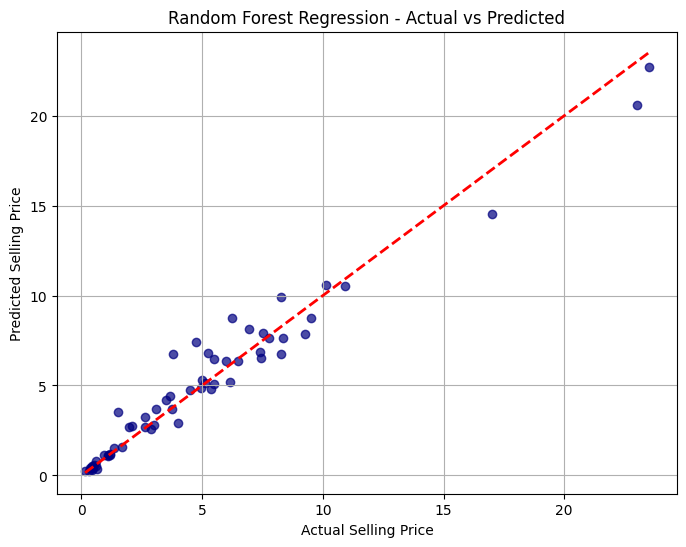

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='navy')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Random Forest Regression - Actual vs Predicted")
plt.grid(True)
plt.show()


 Most points are tightly aligned along the diagonal line, meaning your model is accurately predicting car resale prices across the board

# **Step 6: View Feature Importances**

<ipython-input-10-137970638c6c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')


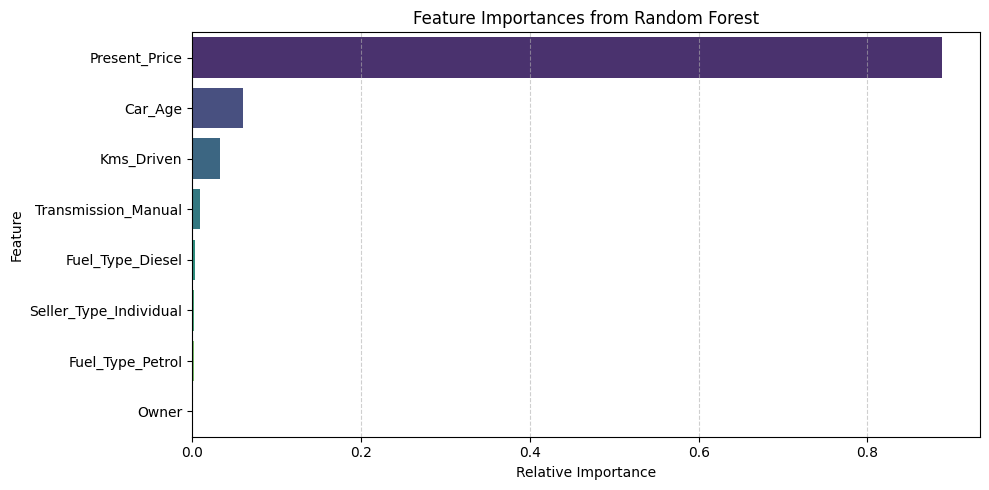

In [10]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create DataFrame for visualization
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')
plt.title("Feature Importances from Random Forest")
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# **Step 7: Save the Random Forest Model**

In [11]:
import joblib

# Save the trained model
joblib.dump(rf_model, "RandomForestReg_CarResalePrice.pkl")

print("Model saved as 'RandomForestReg_CarResalePrice.pkl'")


Model saved as 'RandomForestReg_CarResalePrice.pkl'
